In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Kết nối đến database
conn = sqlite3.connect('data\\Gold_Price.db')




In [4]:
# Function to execute query and fetch data into DataFrame
def fetch_query(query):
    cursor = conn.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(data, columns=columns)

    return df

In [5]:
def convert_date_to_datetime(df,col_time):
    # Chuyển đổi cột 'date' sang định dạng datetime
    df[col_time] = pd.to_datetime(df[col_time])
    # Thiết lập cột 'time' làm chỉ số
    df.set_index(col_time, inplace=True)
    return df

In [6]:
# Đọc dữ liệu từ bảng 'table_name'
query = "SELECT * FROM table_name"
df = fetch_query(query)

# Kiểm tra dữ liệu
print(df.head())
print(df.info())
# Tính toán các giá trị thống kê
print(df.describe())


                         date  BuyPrice_SJC  SellPrice_SJC  BuyPrice_PNJ  \
0  2015-01-01 00:00:00.000000         34.95          35.15         34.95   
1  2015-01-02 00:00:00.000000         34.95          35.15         34.90   
2  2015-01-03 00:00:00.000000         34.95          35.15         34.90   
3  2015-01-04 00:00:00.000000         34.95          35.15         34.90   
4  2015-01-05 00:00:00.000000         35.09          35.19         35.08   

   SellPrice_PNJ  
0          35.15  
1          35.15  
2          35.20  
3          35.20  
4          35.18  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3459 non-null   object 
 1   BuyPrice_SJC   3459 non-null   float64
 2   SellPrice_SJC  3459 non-null   float64
 3   BuyPrice_PNJ   3459 non-null   float64
 4   SellPrice_PNJ  3459 non-null   float64
dtypes: float64

### **Trung bình hằng tháng và trung bình hằng năm**

In [63]:


# Define the SQL query to calculate the monthly averages
query = """
SELECT
    strftime('%Y-%m', date) AS month,
    AVG(BuyPrice_SJC) AS avg_BuyPrice_SJC,
    AVG(SellPrice_SJC) AS avg_SellPrice_SJC,
    AVG(BuyPrice_PNJ) AS avg_BuyPrice_PNJ,
    AVG(SellPrice_PNJ) AS avg_SellPrice_PNJ
FROM
    table_name
GROUP BY
    strftime('%Y-%m', date)
ORDER BY
    month;
"""



# Convert the results to a DataFrame for better display
df_monthly_averages = fetch_query(query)
df_monthly_averages = convert_date_to_datetime(df_monthly_averages,'month')
# Display the results
print(df_monthly_averages)

query = '''
SELECT
    strftime('%Y', date) AS Year,
    AVG(BuyPrice_SJC) AS Avg_BuyPrice_SJC,
    AVG(SellPrice_SJC) AS Avg_SellPrice_SJC,
    AVG(BuyPrice_PNJ) AS Avg_BuyPrice_PNJ,
    AVG(SellPrice_PNJ) AS Avg_SellPrice_PNJ
FROM
    table_name
GROUP BY
    strftime('%Y', date)
ORDER BY
    Year;
'''
df_yearly_averages = fetch_query(query)
df_yearly_averages = convert_date_to_datetime(df_yearly_averages,'Year')
print(df_yearly_averages)

# plt.figure(figsize=(14, 7))
# plt.plot(df_monthly_averages.index, df_monthly_averages['avg_SellPrice_SJC'], label='avg_SellPrice_SJC')
# plt.plot(df_monthly_averages.index, df_monthly_averages['avg_SellPrice_PNJ'], label='avg_SellPrice_PNJ')
# plt.xlabel('Date')
# plt.ylabel('Price (million VND/tael)')
# plt.title('Gold Prices Trend (SJC vs PNJ)')
# plt.legend()
# plt.grid(True)
# plt.show()

            avg_BuyPrice_SJC  avg_SellPrice_SJC  avg_BuyPrice_PNJ  \
month                                                               
2015-01-01         35.287742          35.400645         35.295484   
2015-02-01         35.373214          35.510357         35.378214   
2015-03-01         35.243548          35.350323         35.254194   
2015-04-01         35.088667          35.188000         35.111000   
2015-05-01         34.958065          35.023226         34.964516   
...                      ...                ...               ...   
2024-02-01         76.220690          78.475862         76.453448   
2024-03-01         78.961290          81.090323         78.954839   
2024-04-01         81.210000          83.313333         81.230000   
2024-05-01         86.425806          88.783871         86.666129   
2024-06-01         75.947000          77.882000         75.927000   

            avg_SellPrice_PNJ  
month                          
2015-01-01          35.407742  
2015-0

### **1. What is the overall trend of SJC and PNJ gold prices from 2015 to present?**

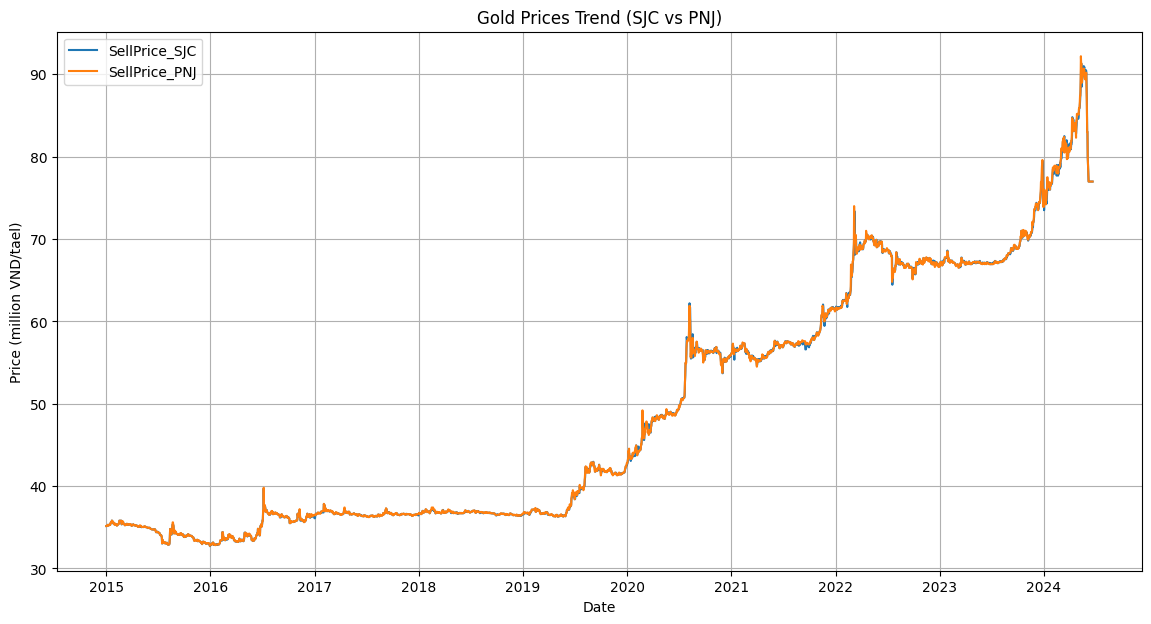

In [7]:
df = convert_date_to_datetime(df,'date')
# Vẽ biểu đồ xu hướng giá vàng SJC và PNJ
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['SellPrice_SJC'], label='SellPrice_SJC')
plt.plot(df.index, df['SellPrice_PNJ'], label='SellPrice_PNJ')
plt.xlabel('Date')
plt.ylabel('Price (million VND/tael)')
plt.title('Gold Prices Trend (SJC vs PNJ)')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Define the SQL query to calculate the year averages
query = """
SELECT
    strftime('%Y', date) AS year,
    AVG(BuyPrice_SJC) AS avg_BuyPrice_SJC,
    AVG(SellPrice_SJC) AS avg_SellPrice_SJC,
    AVG(BuyPrice_PNJ) AS avg_BuyPrice_PNJ,
    AVG(SellPrice_PNJ) AS avg_SellPrice_PNJ
FROM
    table_name
GROUP BY
    strftime('%Y', date)
ORDER BY
    year;
"""
df_yearly_averages = fetch_query(query)

df_yearly_averages = convert_date_to_datetime(df_yearly_averages,'year')


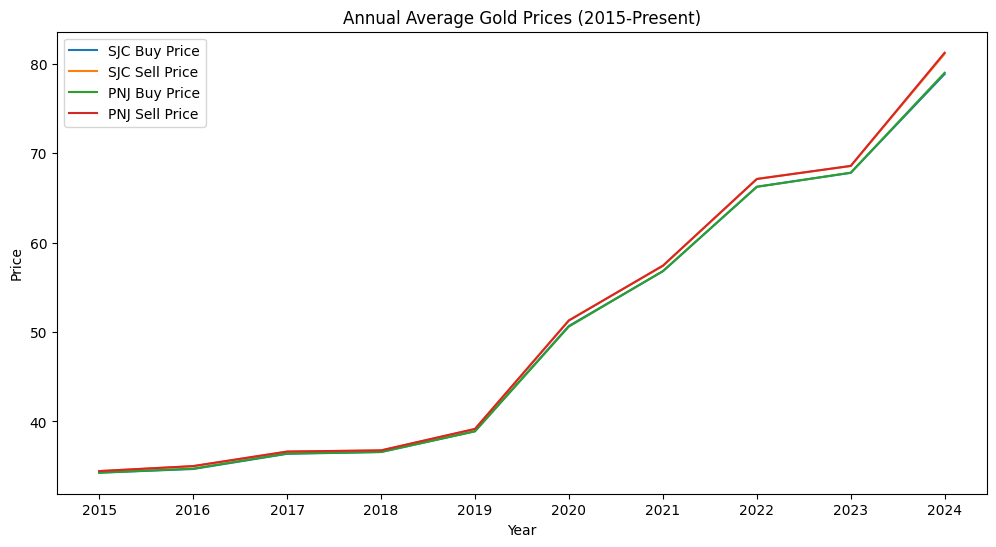

In [9]:


# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_averages.index, df_yearly_averages['avg_BuyPrice_SJC'], label='SJC Buy Price')
plt.plot(df_yearly_averages.index, df_yearly_averages['avg_SellPrice_SJC'], label='SJC Sell Price')
plt.plot(df_yearly_averages.index, df_yearly_averages['avg_BuyPrice_PNJ'], label='PNJ Buy Price')
plt.plot(df_yearly_averages.index, df_yearly_averages['avg_SellPrice_PNJ'], label='PNJ Sell Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Annual Average Gold Prices (2015-Present)')
plt.legend()
plt.show()

### **2. How do SJC and PNJ gold prices correlate with each other?**

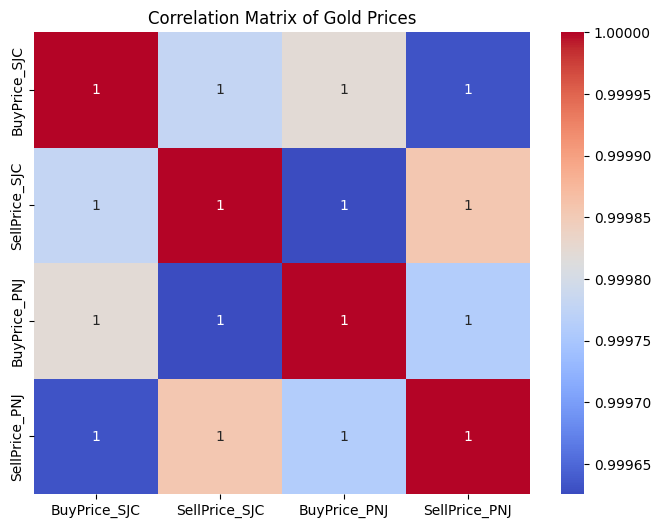

In [10]:
correlation = df[['BuyPrice_SJC', 'SellPrice_SJC', 'BuyPrice_PNJ', 'SellPrice_PNJ']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Gold Prices')
plt.show()


### **3. How does the volatility of SJC and PNJ gold prices differ over the years?**

In [42]:

data_query = """
SELECT
    strftime('%Y', date) AS year,
    BuyPrice_SJC,
    SellPrice_SJC,
    BuyPrice_PNJ,
    SellPrice_PNJ
FROM
    table_name
"""

# Thực hiện truy vấn và tải dữ liệu vào DataFrame
data_df = pd.read_sql_query(data_query, conn)

# Tính toán độ lệch chuẩn hàng năm
annual_std_dev = data_df.groupby('year').std()
print(annual_std_dev)



      BuyPrice_SJC  SellPrice_SJC  BuyPrice_PNJ  SellPrice_PNJ
year                                                          
2015      0.923704       0.873445      0.924656       0.874721
2016      1.409559       1.451995      1.428539       1.451897
2017      0.240402       0.231923      0.211094       0.243233
2018      0.168296       0.177364      0.174572       0.193122
2019      2.375721       2.430130      2.366486       2.430432
2020      4.722905       4.859346      4.766081       4.799863
2021      1.625260       1.712454      1.624628       1.713025
2022      2.369839       2.399916      2.377873       2.426256
2023      2.294620       2.460954      2.281378       2.482015
2024      4.610144       4.543206      4.586346       4.513194


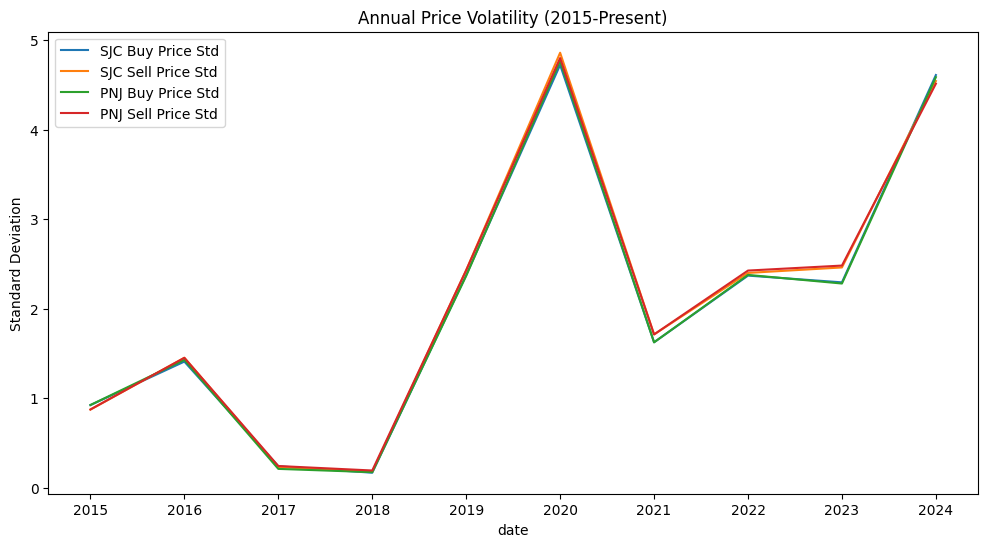

In [43]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(annual_std_dev.index, annual_std_dev['BuyPrice_SJC'], label='SJC Buy Price Std')
plt.plot(annual_std_dev.index, annual_std_dev['SellPrice_SJC'], label='SJC Sell Price Std')
plt.plot(annual_std_dev.index, annual_std_dev['BuyPrice_PNJ'], label='PNJ Buy Price Std')
plt.plot(annual_std_dev.index, annual_std_dev['SellPrice_PNJ'], label='PNJ Sell Price Std')
plt.xlabel('date')
plt.ylabel('Standard Deviation')
plt.title('Annual Price Volatility (2015-Present)')
plt.legend()
plt.show()

>### **4. What is the average difference between the buy and sell prices of SJC and PNJ gold over the years?**



---





###Chênh lệch giá mua và giá bán

In [107]:
# Daily spreaderences query
daily_spread_query = """
SELECT
    date,
    SellPrice_SJC - BuyPrice_SJC AS daily_spread_SJC,
    SellPrice_PNJ - BuyPrice_PNJ AS daily_spread_PNJ
FROM
    table_name
ORDER BY
    date;
"""
df_daily_spread = convert_date_to_datetime(fetch_query(daily_spread_query),'date')

# Monthly spreaderences query
monthly_spread_query = """
WITH monthly_averages AS (
    SELECT
        strftime('%Y-%m', date) AS month,
        AVG(SellPrice_SJC) AS avg_SellPrice_SJC,
        AVG(BuyPrice_SJC) AS avg_BuyPrice_SJC,
        AVG(SellPrice_PNJ) AS avg_SellPrice_PNJ,
        AVG(BuyPrice_PNJ) AS avg_BuyPrice_PNJ
    FROM
        table_name
    GROUP BY
        strftime('%Y-%m', date)
)
SELECT
    month,
    avg_SellPrice_SJC - avg_BuyPrice_SJC AS monthly_spread_SJC,
    avg_SellPrice_PNJ - avg_BuyPrice_PNJ AS monthly_spread_PNJ
FROM
    monthly_averages
ORDER BY
    month;
"""
df_monthly_spread = fetch_query(monthly_spread_query)
df_monthly_spread = convert_date_to_datetime(df_monthly_spread,'month')
# Yearly spreaderences query
yearly_spread_query = """
WITH yearly_averages AS (
    SELECT
        strftime('%Y', date) AS year,
        AVG(SellPrice_SJC) AS avg_SellPrice_SJC,
        AVG(BuyPrice_SJC) AS avg_BuyPrice_SJC,
        AVG(SellPrice_PNJ) AS avg_SellPrice_PNJ,
        AVG(BuyPrice_PNJ) AS avg_BuyPrice_PNJ
    FROM
        table_name
    GROUP BY
        strftime('%Y', date)
)
SELECT
    year,
    avg_SellPrice_SJC - avg_BuyPrice_SJC AS yearly_spread_SJC,
    avg_SellPrice_PNJ - avg_BuyPrice_PNJ AS yearly_spread_PNJ
FROM
    yearly_averages
ORDER BY
    year;
"""
df_yearly_spread = fetch_query(yearly_spread_query)

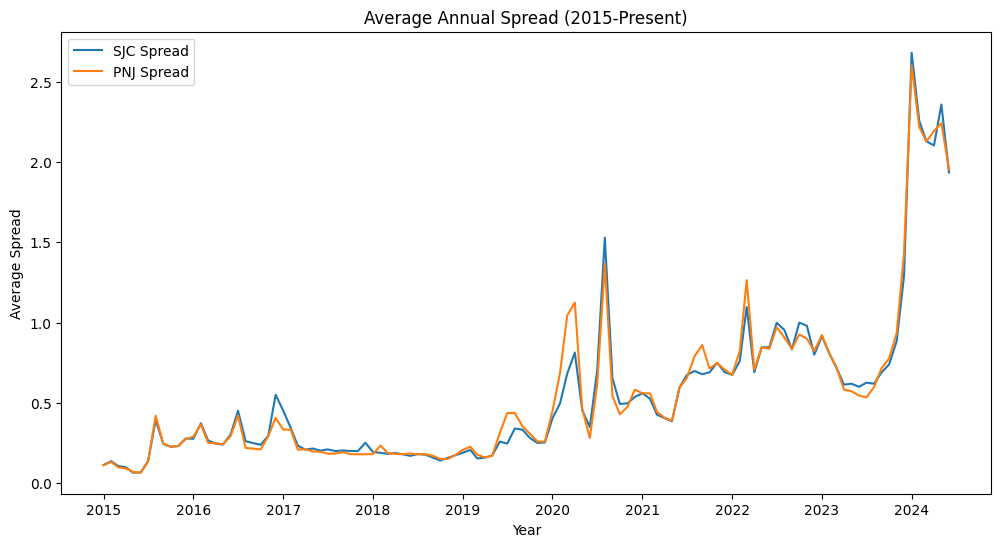

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_spread.index, df_monthly_spread['monthly_spread_SJC'], label='SJC Spread')
plt.plot(df_monthly_spread.index, df_monthly_spread['monthly_spread_PNJ'], label='PNJ Spread')
plt.xlabel('Year')
plt.ylabel('Average Spread')
plt.title('Average Annual Spread (2015-Present)')
plt.legend()
plt.show()

### **5. Has the difference between the buy and sell prices of SJC and PNJ gold tended to increase or decrease over time?**

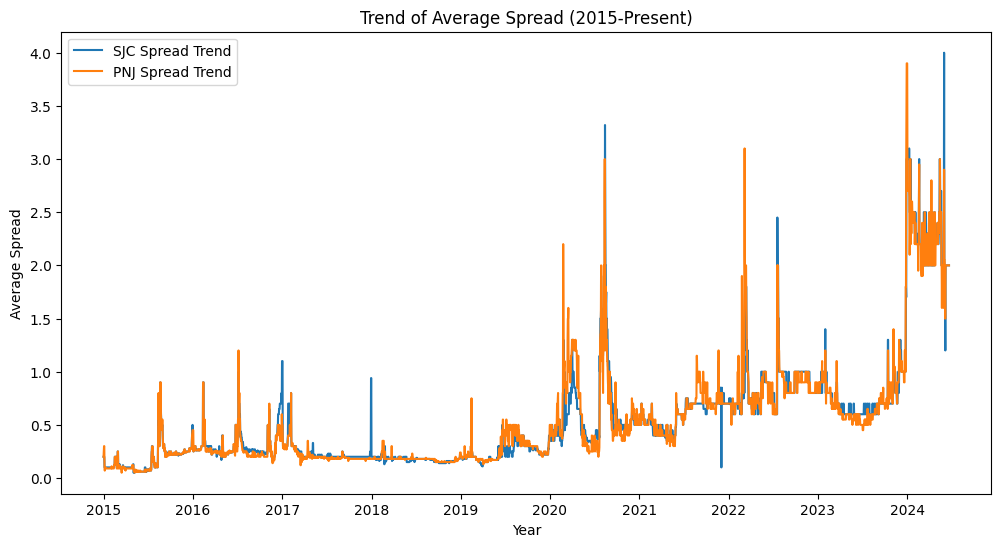

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df_daily_spread.index, df_daily_spread['daily_spread_SJC'], label='SJC Spread Trend')
plt.plot(df_daily_spread.index, df_daily_spread['daily_spread_PNJ'], label='PNJ Spread Trend')
plt.xlabel('Year')
plt.ylabel('Average Spread')
plt.title('Trend of Average Spread (2015-Present)')
plt.legend()
plt.show()

### **6. When during the year are SJC and PNJ gold prices typically the highest and lowest?**

### Trung bình tháng cao nhất và thấp nhất các năm

In [ ]:
# Monthly highest price query
highest_price_query = """
WITH monthly_averages AS (
    SELECT
        strftime('%Y', date) AS year,
        strftime('%m', date) AS month,
        AVG(BuyPrice_SJC) AS avg_BuyPrice_SJC,
        AVG(SellPrice_SJC) AS avg_SellPrice_SJC,
        AVG(BuyPrice_PNJ) AS avg_BuyPrice_PNJ,
        AVG(SellPrice_PNJ) AS avg_SellPrice_PNJ
    FROM
        table_name
    GROUP BY
        strftime('%Y-%m', date)
)
SELECT
    year,
    month,
    avg_BuyPrice_SJC,
    avg_SellPrice_SJC,
    avg_BuyPrice_PNJ,
    avg_SellPrice_PNJ
FROM
    monthly_averages
WHERE
    avg_BuyPrice_SJC = (SELECT MAX(avg_BuyPrice_SJC) FROM monthly_averages AS ma WHERE ma.year = monthly_averages.year)
    OR avg_SellPrice_SJC = (SELECT MAX(avg_SellPrice_SJC) FROM monthly_averages AS ma WHERE ma.year = monthly_averages.year)
    OR avg_BuyPrice_PNJ = (SELECT MAX(avg_BuyPrice_PNJ) FROM monthly_averages AS ma WHERE ma.year = monthly_averages.year)
    OR avg_SellPrice_PNJ = (SELECT MAX(avg_SellPrice_PNJ) FROM monthly_averages AS ma WHERE ma.year = monthly_averages.year)
ORDER BY
    year, month;

"""

# Fetch the data
df_highest_price = fetch_query(highest_price_query)

# Monthly lowest price query
lowest_price_query = """
WITH monthly_averages AS (
    SELECT
        strftime('%Y', date) AS year,
        strftime('%m', date) AS month,
        AVG(BuyPrice_SJC) AS avg_BuyPrice_SJC,
        AVG(SellPrice_SJC) AS avg_SellPrice_SJC,
        AVG(BuyPrice_PNJ) AS avg_BuyPrice_PNJ,
        AVG(SellPrice_PNJ) AS avg_SellPrice_PNJ
    FROM
        table_name
    GROUP BY
        strftime('%Y-%m', date)
)
SELECT
    year,
    month,
    avg_BuyPrice_SJC,
    avg_SellPrice_SJC,
    avg_BuyPrice_PNJ,
    avg_SellPrice_PNJ
FROM
    monthly_averages
WHERE
    avg_BuyPrice_SJC = (SELECT MIN(avg_BuyPrice_SJC) FROM monthly_averages AS ma WHERE ma.year = monthly_averages.year)
    OR avg_SellPrice_SJC = (SELECT MIN(avg_SellPrice_SJC) FROM monthly_averages AS ma WHERE ma.year = monthly_averages.year)
    OR avg_BuyPrice_PNJ = (SELECT MIN(avg_BuyPrice_PNJ) FROM monthly_averages AS ma WHERE ma.year = monthly_averages.year)
    OR avg_SellPrice_PNJ = (SELECT MIN(avg_SellPrice_PNJ) FROM monthly_averages AS ma WHERE ma.year = monthly_averages.year)
ORDER BY
    year, month;
"""

# Fetch the data
df_lowest_price = fetch_query(lowest_price_query)



# Display the results
print('lowest\n',df_lowest_price.head(12))
print('highest\n',df_highest_price.head(12))

lowest
     year month  avg_BuyPrice_SJC  avg_SellPrice_SJC  avg_BuyPrice_PNJ  \
0   2015    12         32.791935          33.070000         32.807097   
1   2016    01         32.658065          32.934516         32.651290   
2   2017    07         36.130000          36.340323         36.156452   
3   2018    12         36.287097          36.460645         36.304194   
4   2019    05         36.236774          36.409355         36.231290   
5   2020    01         43.147097          43.550323         43.272581   
6   2021    04         55.003333          55.408667         55.056000   
7   2022    01         61.191613          61.865806         61.148387   
8   2023    03         66.320968          67.040323         66.312903   
9   2023    06         66.461667          67.061667         66.481667   
10  2024    01         73.203226          75.883871         73.554839   

    avg_SellPrice_PNJ  
0           33.081290  
1           32.940000  
2           36.340000  
3           36.4787

In [ ]:
# Monthly highest price query
highest_price_query = """
WITH monthly_max_day AS (
    SELECT
        strftime('%Y', date) AS year,
        date,
        MAX(BuyPrice_SJC) AS MAX_BuyPrice_SJC,
        MAX(SellPrice_SJC) AS MAX_SellPrice_SJC,
        MAX(BuyPrice_PNJ) AS MAX_BuyPrice_PNJ,
        MAX(SellPrice_PNJ) AS MAX_SellPrice_PNJ
    FROM
        table_name
    GROUP BY
        strftime('%Y-%m', date)
)
SELECT
    year,
    date,
    MAX_BuyPrice_SJC,
    MAX_SellPrice_SJC,
    MAX_BuyPrice_PNJ,
    MAX_SellPrice_PNJ
FROM
    monthly_max_day
WHERE
    MAX_BuyPrice_SJC = (SELECT MAX(MAX_BuyPrice_SJC) FROM monthly_max_day AS ma WHERE ma.year = monthly_max_day.year)
    OR MAX_SellPrice_SJC = (SELECT MAX(MAX_SellPrice_SJC) FROM monthly_max_day AS ma WHERE ma.year = monthly_max_day.year)
    OR MAX_BuyPrice_PNJ = (SELECT MAX(MAX_BuyPrice_PNJ) FROM monthly_max_day AS ma WHERE ma.year = monthly_max_day.year)
    OR MAX_SellPrice_PNJ = (SELECT MAX(MAX_SellPrice_PNJ) FROM monthly_max_day AS ma WHERE ma.year = monthly_max_day.year)
ORDER BY
    year, date;

"""
highest_price_query = fetch_query(highest_price_query)

In [ ]:
highest_price_query.head(12)

,year,date,MAX_BuyPrice_SJC,MAX_SellPrice_SJC,MAX_BuyPrice_PNJ,MAX_SellPrice_PNJ
0,2015,2015-01-21 00:00:00.000000,35.72,35.82,35.73,35.82
1,2016,2016-07-06 00:00:00.000000,38.70,39.70,38.60,39.80
2,2017,2017-02-02 00:00:00.000000,37.43,37.83,37.45,37.85
3,2018,2018-01-25 00:00:00.000000,36.96,37.16,37.02,37.20
4,2019,2019-09-05 00:00:00.000000,42.65,42.95,42.50,42.90
5,2020,2020-08-07 00:00:00.000000,60.60,62.20,60.10,61.90
6,2021,2021-11-16 00:00:00.000000,61.30,62.05,61.10,61.90
7,2022,2022-03-07 00:00:00.000000,71.80,73.40,70.90,74.00
8,2023,2023-12-27 00:00:00.000000,77.80,79.50,77.80,79.60
9,2024,2024-05-10 00:00:00.000000,89.00,91.30,89.90,92.20


###Mùa cao nhất năm

In [ ]:
highest_seasonal_price_query = """
WITH seasonal_averages AS (
    SELECT
        strftime('%Y', date) AS year,
        CASE
            WHEN strftime('%m', date) IN ('01', '02', '03') THEN 'Spring'
            WHEN strftime('%m', date) IN ('04', '05', '06') THEN 'Summer'
            WHEN strftime('%m', date) IN ('07', '08', '09') THEN 'Fall'
            ELSE 'Winter'
        END AS season,
        AVG(BuyPrice_SJC) AS avg_BuyPrice_SJC,
        AVG(SellPrice_SJC) AS avg_SellPrice_SJC,
        AVG(BuyPrice_PNJ) AS avg_BuyPrice_PNJ,
        AVG(SellPrice_PNJ) AS avg_SellPrice_PNJ
    FROM
        table_name
    GROUP BY
        year, season
)
SELECT
    year,
    season,
    avg_BuyPrice_SJC,
    avg_SellPrice_SJC,
    avg_BuyPrice_PNJ,
    avg_SellPrice_PNJ
FROM
    seasonal_averages
WHERE
    avg_BuyPrice_SJC = (SELECT MAX(avg_BuyPrice_SJC) FROM seasonal_averages AS sa WHERE sa.year = seasonal_averages.year)
    OR avg_SellPrice_SJC = (SELECT MAX(avg_SellPrice_SJC) FROM seasonal_averages AS sa WHERE sa.year = seasonal_averages.year)
    OR avg_BuyPrice_PNJ = (SELECT MAX(avg_BuyPrice_PNJ) FROM seasonal_averages AS sa WHERE sa.year = seasonal_averages.year)
    OR avg_SellPrice_PNJ = (SELECT MAX(avg_SellPrice_PNJ) FROM seasonal_averages AS sa WHERE sa.year = seasonal_averages.year)
ORDER BY
    year, season;
"""

# Fetch the data
df_highest_seasonal_price = fetch_query(highest_seasonal_price_query)

In [ ]:
df_highest_seasonal_price.head(12)


,year,season,avg_BuyPrice_SJC,avg_SellPrice_SJC,avg_BuyPrice_PNJ,avg_SellPrice_PNJ
0,2015,Spring,35.299111,35.417444,35.307000,35.420889
1,2016,Fall,36.304891,36.626304,36.353043,36.638696
2,2017,Spring,36.480889,36.823000,36.562111,36.852444
3,2018,Spring,36.684222,36.872667,36.699556,36.899556
4,2019,Winter,41.470435,41.732391,41.459130,41.734565
5,2020,Winter,55.426087,55.935326,55.425109,55.920652
6,2021,Winter,59.060326,59.770652,59.063587,59.786957
7,2022,Summer,68.712637,69.507692,68.708242,69.505495
8,2023,Winter,71.111957,72.083696,71.103804,72.152174
9,2024,Summer,81.906667,84.065926,82.001111,84.154198


### **7. What is the annual rate of change for the buy and sell prices of SJC and PNJ gold?**

###Chênh lệch so với tháng trước

In [118]:
daily_diff_query = """
SELECT
    date,
    BuyPrice_SJC - LAG(BuyPrice_SJC) OVER (ORDER BY date) AS daily_diff_BuyPrice_SJC,
    SellPrice_SJC - LAG(SellPrice_SJC) OVER (ORDER BY date) AS daily_diff_SellPrice_SJC,
    BuyPrice_PNJ - LAG(BuyPrice_PNJ) OVER (ORDER BY date) AS daily_diff_BuyPrice_PNJ,
    SellPrice_PNJ - LAG(SellPrice_PNJ) OVER (ORDER BY date) AS daily_diff_SellPrice_PNJ
FROM
    table_name
ORDER BY
    date;
"""
df_daily_diff = fetch_query(daily_diff_query)

# Monthly differences query
monthly_diff_query = """
WITH monthly_averages AS (
    SELECT
        strftime('%Y-%m', date) AS month,
        AVG(BuyPrice_SJC) AS avg_BuyPrice_SJC,
        AVG(SellPrice_SJC) AS avg_SellPrice_SJC,
        AVG(BuyPrice_PNJ) AS avg_BuyPrice_PNJ,
        AVG(SellPrice_PNJ) AS avg_SellPrice_PNJ
    FROM
        table_name
    GROUP BY
        strftime('%Y-%m', date)
)
SELECT
    month,
    avg_BuyPrice_SJC - LAG(avg_BuyPrice_SJC) OVER (ORDER BY month) AS monthly_diff_BuyPrice_SJC,
    avg_SellPrice_SJC - LAG(avg_SellPrice_SJC) OVER (ORDER BY month) AS monthly_diff_SellPrice_SJC,
    avg_BuyPrice_PNJ - LAG(avg_BuyPrice_PNJ) OVER (ORDER BY month) AS monthly_diff_BuyPrice_PNJ,
    avg_SellPrice_PNJ - LAG(avg_SellPrice_PNJ) OVER (ORDER BY month) AS monthly_diff_SellPrice_PNJ
FROM
    monthly_averages
ORDER BY
    month;
"""
df_monthly_diff = convert_date_to_datetime(fetch_query(monthly_diff_query),'month')
# Yearly differences query
yearly_diff_query = """
WITH yearly_averages AS (
    SELECT
        strftime('%Y', date) AS year,
        AVG(BuyPrice_SJC) AS avg_BuyPrice_SJC,
        AVG(SellPrice_SJC) AS avg_SellPrice_SJC,
        AVG(BuyPrice_PNJ) AS avg_BuyPrice_PNJ,
        AVG(SellPrice_PNJ) AS avg_SellPrice_PNJ
    FROM
        table_name
    GROUP BY
        strftime('%Y', date)
)
SELECT
    year,
    (avg_BuyPrice_SJC - LAG(avg_BuyPrice_SJC) OVER (ORDER BY year))/LAG(avg_BuyPrice_SJC) OVER (ORDER BY year)* 100 AS yearly_diff_BuyPrice_SJC,
    (avg_SellPrice_SJC - LAG(avg_SellPrice_SJC) OVER (ORDER BY year))/LAG(avg_SellPrice_SJC) OVER (ORDER BY year)* 100 AS yearly_diff_SellPrice_SJC,
    (avg_BuyPrice_PNJ - LAG(avg_BuyPrice_PNJ) OVER (ORDER BY year))/LAG(avg_BuyPrice_PNJ) OVER (ORDER BY year)* 100 AS yearly_diff_BuyPrice_PNJ,
    (avg_SellPrice_PNJ - LAG(avg_SellPrice_PNJ) OVER (ORDER BY year))/LAG(avg_SellPrice_PNJ) OVER (ORDER BY year)* 100 AS yearly_diff_SellPrice_PNJ
FROM
    yearly_averages
ORDER BY
    year;
"""
df_yearly_diff = fetch_query(yearly_diff_query)
df_yearly_diff.set_index('year', inplace=True)

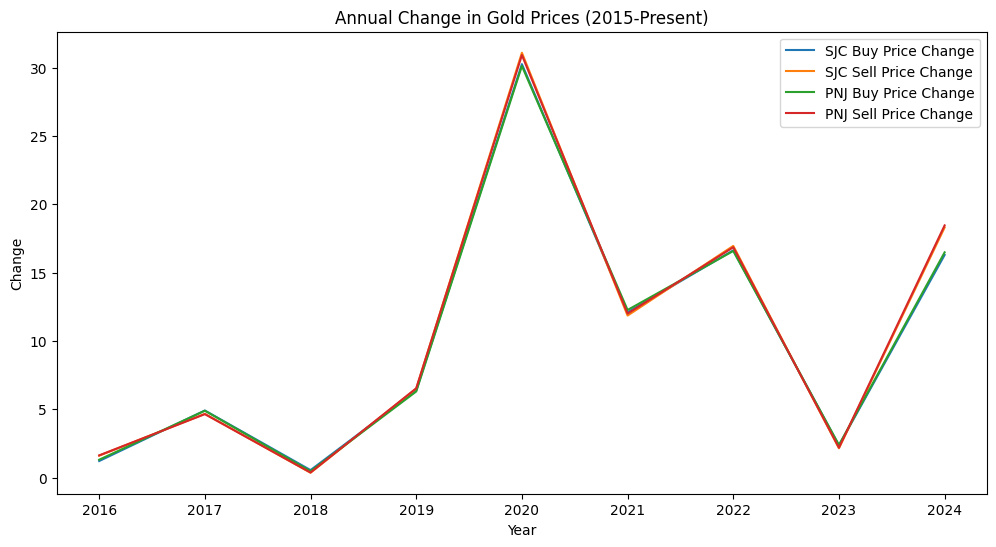

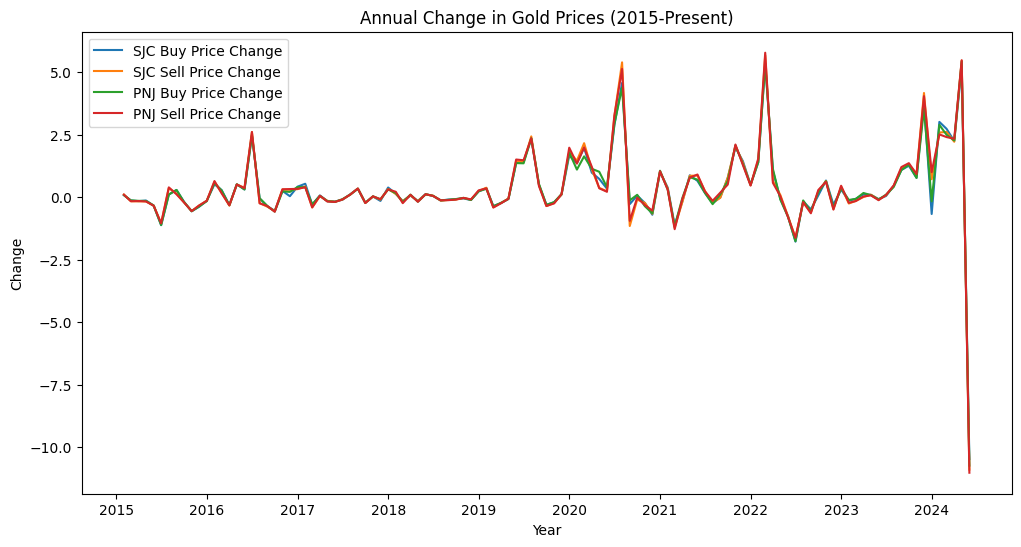

In [69]:

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_diff.index, df_yearly_diff['yearly_diff_BuyPrice_SJC'], label='SJC Buy Price Change')
plt.plot(df_yearly_diff.index, df_yearly_diff['yearly_diff_SellPrice_SJC'], label='SJC Sell Price Change')
plt.plot(df_yearly_diff.index, df_yearly_diff['yearly_diff_BuyPrice_PNJ'], label='PNJ Buy Price Change')
plt.plot(df_yearly_diff.index, df_yearly_diff['yearly_diff_SellPrice_PNJ'], label='PNJ Sell Price Change')
plt.xlabel('Year')
plt.ylabel('Change')
plt.title('Annual Change in Gold Prices (2015-Present)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_monthly_diff.index, df_monthly_diff['monthly_diff_BuyPrice_SJC'], label='SJC Buy Price Change')
plt.plot(df_monthly_diff.index, df_monthly_diff['monthly_diff_SellPrice_SJC'], label='SJC Sell Price Change')
plt.plot(df_monthly_diff.index, df_monthly_diff['monthly_diff_BuyPrice_PNJ'], label='PNJ Buy Price Change')
plt.plot(df_monthly_diff.index, df_monthly_diff['monthly_diff_SellPrice_PNJ'], label='PNJ Sell Price Change')
plt.xlabel('Year')
plt.ylabel('Change')
plt.title('Annual Change in Gold Prices (2015-Present)')
plt.legend()
plt.show()


### **8. What significant fluctuations in SJC and PNJ gold prices were observed in 2020 (the year of the COVID-19 pandemic)?**

In [39]:
query ='''
SELECT
    date,
    BuyPrice_SJC,
    SellPrice_SJC,
    BuyPrice_PNJ,
    SellPrice_PNJ
FROM
    table_name
WHERE
    strftime('%Y', date) = '2020'
ORDER BY
    date;
'''
data_2020 = fetch_query(query)
data_2020 = convert_date_to_datetime(data_2020,'date')


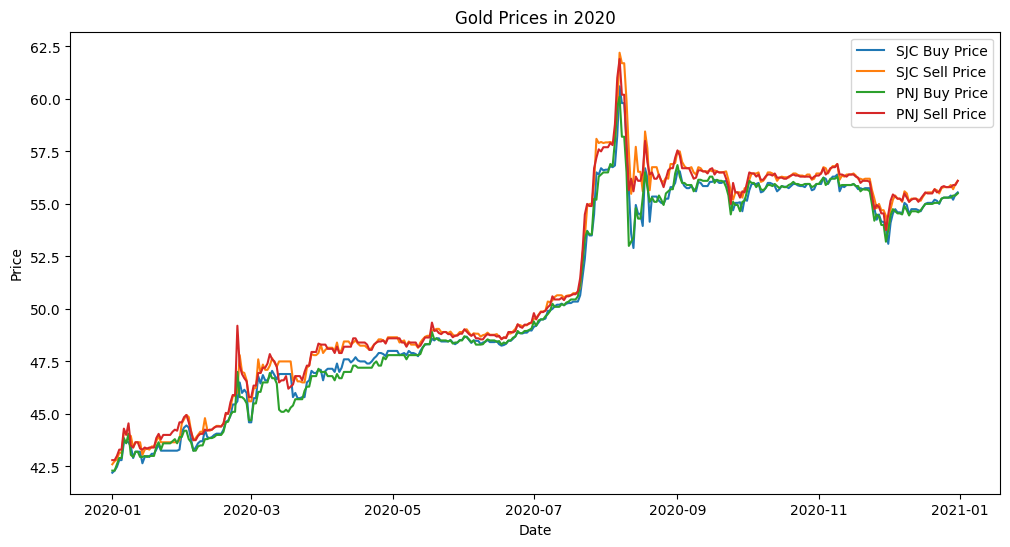

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(data_2020.index, data_2020['BuyPrice_SJC'], label='SJC Buy Price')
plt.plot(data_2020.index, data_2020['SellPrice_SJC'], label='SJC Sell Price')
plt.plot(data_2020.index, data_2020['BuyPrice_PNJ'], label='PNJ Buy Price')
plt.plot(data_2020.index, data_2020['SellPrice_PNJ'], label='PNJ Sell Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices in 2020')
plt.legend()
plt.show()

### **9. How does the growth rate of SJC and PNJ gold prices compare to the inflation rate over the years?**

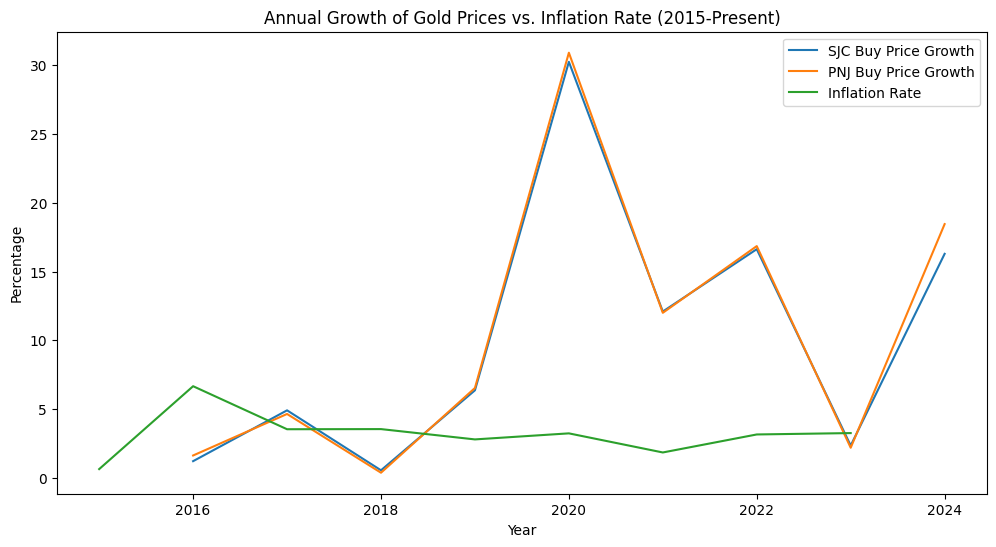

In [125]:
# Giả sử bạn đã có dữ liệu lạm phát hàng năm trong DataFrame khác có tên là inflation_df
inflation_df = pd.read_csv('data/inflation_data.csv')
inflation_df = convert_date_to_datetime(inflation_df,'year')
df_yearly_diff.index = df_yearly_diff.index.astype(int)
inflation_df.index = inflation_df.index.astype(int)
# Kết hợp dữ liệu lạm phát với dữ liệu tăng trưởng giá vàng
combined_df =  df_yearly_diff.merge(inflation_df, left_index=True, right_index=True, how='left')

# # Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['yearly_diff_BuyPrice_SJC'], label='SJC Buy Price Growth')
plt.plot(combined_df.index, combined_df['yearly_diff_SellPrice_PNJ'], label='PNJ Buy Price Growth')
plt.plot(combined_df.index, combined_df['inflation'], label='Inflation Rate')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Annual Growth of Gold Prices vs. Inflation Rate (2015-Present)')
plt.legend()
plt.show()
